In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from scipy.stats import mstats

DATA_PATH = "./data/"

# Load training data
Change the value of DATA_PATH to reflect the location of csv data if is not located on default place

In [10]:
jan2014 = pd.read_csv(DATA_PATH+"/JAN2014/108043198_T_ONTIME.csv")
feb2014 = pd.read_csv(DATA_PATH+"/FEB2014/108043198_T_ONTIME.csv")
mar2014 = pd.read_csv(DATA_PATH+"/MAR2014/108043198_T_ONTIME.csv")
apr2014 = pd.read_csv(DATA_PATH+"/APR2014/108043198_T_ONTIME.csv")
may2014 = pd.read_csv(DATA_PATH+"/MAY2014/108043198_T_ONTIME.csv")
jun2014 = pd.read_csv(DATA_PATH+"/JUN2014/108043198_T_ONTIME.csv")
jul2014 = pd.read_csv(DATA_PATH+"/JUL2014/108043198_T_ONTIME.csv")
aug2014 = pd.read_csv(DATA_PATH+"/AUG2014/108043198_T_ONTIME.csv")
sep2014 = pd.read_csv(DATA_PATH+"/SEP2014/108043198_T_ONTIME.csv")
oct2014 = pd.read_csv(DATA_PATH+"/OCT2014/108043198_T_ONTIME.csv")
nov2014 = pd.read_csv(DATA_PATH+"/NOV2014/108043198_T_ONTIME.csv")
dec2014 = pd.read_csv(DATA_PATH+"/DEC2014/108043198_T_ONTIME.csv")
jan2015 = pd.read_csv(DATA_PATH+"/JAN2015/108043198_T_ONTIME.csv")
feb2015 = pd.read_csv(DATA_PATH+"/FEB2015/108043198_T_ONTIME.csv")
mar2015 = pd.read_csv(DATA_PATH+"/MAR2015/108043198_T_ONTIME.csv")
apr2015 = pd.read_csv(DATA_PATH+"/APR2015/108043198_T_ONTIME.csv")
may2015 = pd.read_csv(DATA_PATH+"/MAY2015/108043198_T_ONTIME.csv")
jun2015 = pd.read_csv(DATA_PATH+"/JUN2015/108043198_T_ONTIME.csv")
jul2015 = pd.read_csv(DATA_PATH+"/JUL2015/108043198_T_ONTIME.csv")
aug2015 = pd.read_csv(DATA_PATH+"/AUG2015/108043198_T_ONTIME.csv")
sep2015 = pd.read_csv(DATA_PATH+"/SEP2015/108043198_T_ONTIME.csv")
oct2015 = pd.read_csv(DATA_PATH+"/OCT2015/108043198_T_ONTIME.csv")
nov2015 = pd.read_csv(DATA_PATH+"/NOV2015/108043198_T_ONTIME.csv")
dec2015 = pd.read_csv(DATA_PATH+"/DEC2015/108043198_T_ONTIME.csv")

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Load testing data

In [42]:
jan2016 = pd.read_csv(DATA_PATH+"/JAN2016/107904530_T_ONTIME.csv")
feb2016 = pd.read_csv(DATA_PATH+"/FEB2016/107904530_T_ONTIME.csv")
mar2016 = pd.read_csv(DATA_PATH+"/MAR2016/107904530_T_ONTIME.csv")
apr2016 = pd.read_csv(DATA_PATH+"/APR2016/107904530_T_ONTIME.csv")
may2016 = pd.read_csv(DATA_PATH+"/MAY2016/107904530_T_ONTIME.csv")
jun2016 = pd.read_csv(DATA_PATH+"/JUN2016/107904530_T_ONTIME.csv")
jul2016 = pd.read_csv(DATA_PATH+"/JUL2016/107904530_T_ONTIME.csv")
aug2016 = pd.read_csv(DATA_PATH+"/AUG2016/107904530_T_ONTIME.csv")
sep2016 = pd.read_csv(DATA_PATH+"/SEP2016/107904530_T_ONTIME.csv")
oct2016 = pd.read_csv(DATA_PATH+"/OCT2016/107904530_T_ONTIME.csv")
nov2016 = pd.read_csv(DATA_PATH+"/NOV2016/107904530_T_ONTIME.csv")

# Variable selection
 Removing variables that provide repeated information, or majority of values is missing

In [134]:

cols_of_interests = [
    "QUARTER",
    "MONTH",
    "DAY_OF_MONTH",
    "DAY_OF_WEEK",
    "AIRLINE_ID",
    "FL_NUM",
    "ORIGIN_AIRPORT_ID",
    "ORIGIN_CITY_MARKET_ID",
    "ORIGIN_STATE_FIPS",
    "ORIGIN_WAC",
    "DEST_AIRPORT_ID",
    "DEST_CITY_MARKET_ID",
    "DEST_STATE_FIPS",
    "DEST_WAC",
    "CRS_DEP_TIME",
    "DEP_TIME",
    "DEP_DELAY",
    "DEP_DELAY_NEW",
    "DEP_DEL15",
    "DEP_DELAY_GROUP",
    "TAXI_OUT",
    "WHEELS_OFF",
    "WHEELS_ON",
    "TAXI_IN",
    "CRS_ARR_TIME",
    "ARR_TIME",
    "ARR_DELAY",
    "ARR_DELAY_NEW",
    "ARR_DEL15",
    "ARR_DELAY_GROUP"
#     "CANCELLED",
#     "DIVERTED",
#     "CRS_ELAPSED_TIME",
#     "ACTUAL_ELAPSED_TIME",
#     "AIR_TIME",
#     "FLIGHTS",
#     "DISTANCE",
#     "DISTANCE_GROUP"
]
print "Number of initial variables",len(cols_of_interests)

Number of initial variables 30


In [138]:
training_data = pd.concat([
    jan2014[cols_of_interests],feb2014[cols_of_interests],mar2014[cols_of_interests],apr2014[cols_of_interests],may2014[cols_of_interests],jun2014[cols_of_interests],jul2014[cols_of_interests],aug2014[cols_of_interests],sep2014[cols_of_interests],oct2014[cols_of_interests],nov2014[cols_of_interests],dec2014[cols_of_interests],
    jan2015[cols_of_interests],feb2015[cols_of_interests],mar2015[cols_of_interests],apr2015[cols_of_interests],may2015[cols_of_interests],jun2015[cols_of_interests],jul2015[cols_of_interests],aug2015[cols_of_interests],sep2015[cols_of_interests],oct2015[cols_of_interests],nov2015[cols_of_interests],dec2015[cols_of_interests]
])
training_data["ARR_DELTA"] = training_data["ARR_TIME"] - training_data["CRS_ARR_TIME"]
training_data["DEP_DELTA"] = training_data["DEP_TIME"] - training_data["CRS_DEP_TIME"]

In [140]:
testing_data = pd.concat([
    jan2016[cols_of_interests],feb2016[cols_of_interests],mar2016[cols_of_interests],apr2016[cols_of_interests],may2016[cols_of_interests],jun2016[cols_of_interests],jul2016[cols_of_interests],aug2016[cols_of_interests],sep2016[cols_of_interests],oct2016[cols_of_interests],nov2016[cols_of_interests]
])
testing_data["ARR_DELTA"] = testing_data["ARR_TIME"] - testing_data["CRS_ARR_TIME"]
testing_data["DEP_DELTA"] = testing_data["DEP_TIME"] - testing_data["CRS_DEP_TIME"]

# Find distribution of missing values

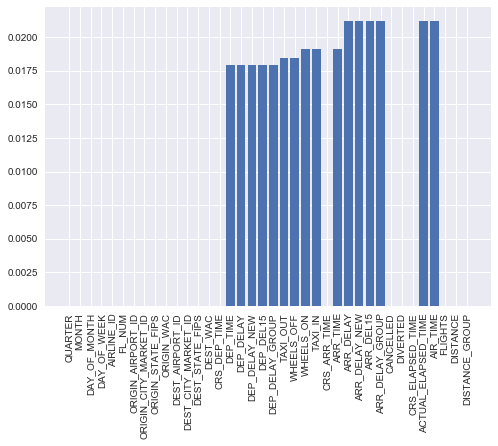

Percent missing values 2.11793392669


In [27]:
total = float(len(training_data))
num_cols = len(cols_of_interests)
na_percent = [0.0] * num_cols
for i in range(num_cols):
    col = cols_of_interests[i]
    try:
        na_percent[i] = sum(np.isnan(training_data[col])) / total
    except TypeError:
        continue

plt.bar(range(len(na_percent)), na_percent)
plt.xticks(range(len(na_percent)), cols_of_interests, rotation='vertical')
plt.show()

In [141]:
total_training_na = float(len(training_data))
training_data = training_data.dropna()
print "Percent training missing values", ((total_training_na - len(training_data)) / total_training_na) * 100

total_testing_na = float(len(testing_data))
testing_data = testing_data.dropna()
print "Percent testing missing values", ((total_testing_na - len(testing_data)) / total_testing_na) * 100

Percent training missing values 2.11793392669
Percent testing missing values 0.0


# Normality test

In [67]:
for col in cols_of_interests:
    print(col+" before transform teststat = %6.3f pvalue = %6.4f" % mstats.normaltest(training_data[col]))
#     inverse_transform = 1 / training_data[col]
#     print(col+" after  transform teststat = %6.3f pvalue = %6.4f" % mstats.normaltest(inverse_transform))
    print "-----------------------------------------------------------------------------"

# Data does not follow a normal distribution

0         20.0
1         26.0
2         -3.0
3         15.0
4         -3.0
7          0.0
8         -3.0
10        40.0
11        91.0
12        -2.0
13        -5.0
14        -5.0
15        -3.0
16        -6.0
17        -9.0
18        -5.0
19        -6.0
20        -4.0
21        -1.0
22        -8.0
23        -8.0
24        -3.0
27        -4.0
28        63.0
29        -1.0
30        -6.0
31         1.0
32        -2.0
33        -7.0
34         0.0
          ... 
479200    27.0
479201    -7.0
479202    33.0
479203    17.0
479204    21.0
479205    20.0
479206    -5.0
479207    -1.0
479208    37.0
479209    -4.0
479210     0.0
479211    -2.0
479212     1.0
479213    27.0
479214     0.0
479215     6.0
479216     6.0
479217    62.0
479218     9.0
479219    -1.0
479220     0.0
479221    -5.0
479222     4.0
479223    10.0
479224    -5.0
479225    -3.0
479226    10.0
479227    20.0
479228    -5.0
479229     0.0
Name: DEP_DELAY, dtype: float64


# Visualize correlation
This evaluation helps find out which variables can provide more value to the model

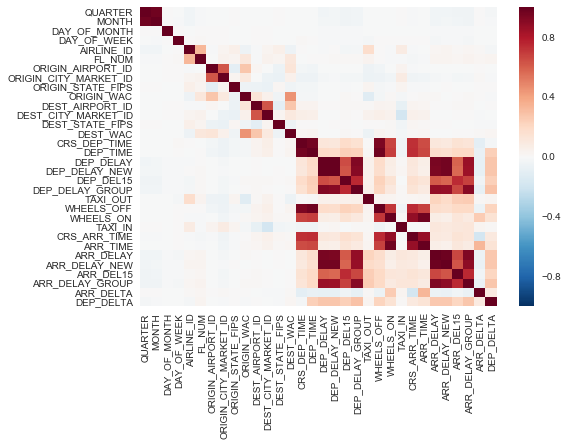

In [142]:
corr = training_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

# Feature selection

In [166]:
independent_vars = ["WHEELS_OFF", "DEP_TIME", "ARR_TIME"]
response_var = ["WHEELS_ON"]

training_data_x = training_data[independent_vars]
training_data_y = training_data[response_var]

testing_data_x = testing_data[independent_vars]
testing_data_y = testing_data[response_var]


# Model Creation

In [171]:
regr = linear_model.LinearRegression()
regr.fit(training_data_x.as_matrix(), training_data_y.as_matrix())
print regr.score(testing_data_x, testing_data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Validation

In [170]:
predicted = np.squeeze(np.asarray(regr.predict(testing_data_x)))
actual = np.squeeze(np.asarray(testing_data_y))
error = np.absolute(predicted - actual)
dindex = range(len(predicted))
d = {
    "actual": actual,
    "predicted": predicted, 
    "error": error
}
print("Mean squared error: %.2f" % np.mean((predicted - actual) ** 2))
print("Mean error: %.2f" % np.mean(predicted - actual))
df = pd.DataFrame(data=d, index=dindex)
print df[["actual", "predicted", "error"]]


Mean squared error: 17183.77
Mean error: -0.52
         actual    predicted       error
0        2107.0  2108.046861    1.046861
1        2315.0  2304.995080   10.004920
2         542.0   716.218924  174.218924
3        2205.0  2170.100495   34.899505
4        1416.0  1397.392819   18.607181
5        1356.0  1408.943674   52.943674
6        1638.0  1635.556387    2.443613
7        1050.0  1055.761024    5.761024
8        1239.0  1245.515033    6.515033
9        2219.0  2217.170354    1.829646
10       1232.0  1232.756378    0.756378
11        650.0   855.197632  205.197632
12       1646.0  1644.568293    1.431707
13       1923.0  1919.941440    3.058560
14        602.0   593.415333    8.584667
15       1459.0  1502.682737   43.682737
16        844.0   839.257426    4.742574
17       1402.0  1385.685057   16.314943
18       1339.0  1348.868019    9.868019
19       1622.0  1616.143155    5.856845
20       2109.0  2106.915386    2.084614
21       1555.0  1540.143698   14.856302
22       1